In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Loading arrays from files

## Loading embedding arrays
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/X_spectral_embeddings.csv') as file_name:
    X_embedding = np.loadtxt(file_name, delimiter=",")
print(X_embedding.shape)

In [25]:
## Loading class labels
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_npc_superclass_results_labels.csv') as file_name:
    csv_label = csv.reader(file_name)
    label_list = []
    for row in csv_label:
        label_list.append(row[0])
print(len(label_list))

16360


## Count the distribution of class labels

In [26]:
label_distri = {i: label_list.count(i) for i in label_list}

In [27]:
len(label_distri) # give the number of labels in total

71

In [28]:
label_distri

{'Oligopeptides': 828,
 'Unclassified': 2859,
 'Small peptides': 662,
 'Triterpenoids': 644,
 'Linear polyketides': 101,
 'Tryptophan alkaloids': 929,
 'Macrolides': 208,
 'Polycyclic aromatic polyketides': 179,
 'Sesterterpenoids': 7,
 'Steroids': 701,
 'Chromanes': 136,
 'Fatty amides': 159,
 'Fatty esters': 125,
 'Naphthalenes': 82,
 'Fatty acyls': 82,
 'Sesquiterpenoids': 522,
 'Peptide alkaloids': 82,
 'Glycerophospholipids': 356,
 'Saccharides': 145,
 'Cyclic polyketides': 106,
 'Anthranilic acid alkaloids': 258,
 'Fatty Acids and Conjugates': 197,
 'Spingolipids': 120,
 'Monoterpenoids': 304,
 'Ornithine alkaloids': 197,
 'Pseudoalkaloids (transamidation)': 298,
 'Flavonoids': 1009,
 'Meroterpenoids': 147,
 'Lysine alkaloids': 262,
 'Coumarins': 766,
 'Polyethers': 21,
 'Lignans': 207,
 'Tyrosine alkaloids': 528,
 'Nicotinic acid alkaloids': 319,
 'Phenylpropanoids (C6-C3)': 166,
 'Diterpenoids': 542,
 'Phenolic acids (C6-C1)': 166,
 'β-lactams': 41,
 'Nucleosides': 161,
 'Histi

In [29]:
## Count the number of labels which have j replicates
uniq_label = [i for i, j in label_distri.items() if j==1]
print(len(uniq_label))


3


In [30]:
sorted_label_distri = dict(sorted(label_distri.items(), key=lambda item: item[1], reverse=True))

In [32]:
list(sorted_label_distri.items())[:20]

[('Unclassified', 2859),
 ('Flavonoids', 1009),
 ('Tryptophan alkaloids', 929),
 ('Oligopeptides', 828),
 ('Coumarins', 766),
 ('Steroids', 701),
 ('Small peptides', 662),
 ('Triterpenoids', 644),
 ('Diterpenoids', 542),
 ('Tyrosine alkaloids', 528),
 ('Sesquiterpenoids', 522),
 ('Glycerophospholipids', 356),
 ('Glycerolipids', 334),
 ('Nicotinic acid alkaloids', 319),
 ('Monoterpenoids', 304),
 ('Pseudoalkaloids (transamidation)', 298),
 ('Lysine alkaloids', 262),
 ('Anthranilic acid alkaloids', 258),
 ('Isoflavonoids', 255),
 ('Macrolides', 208)]

## Plot the distribution

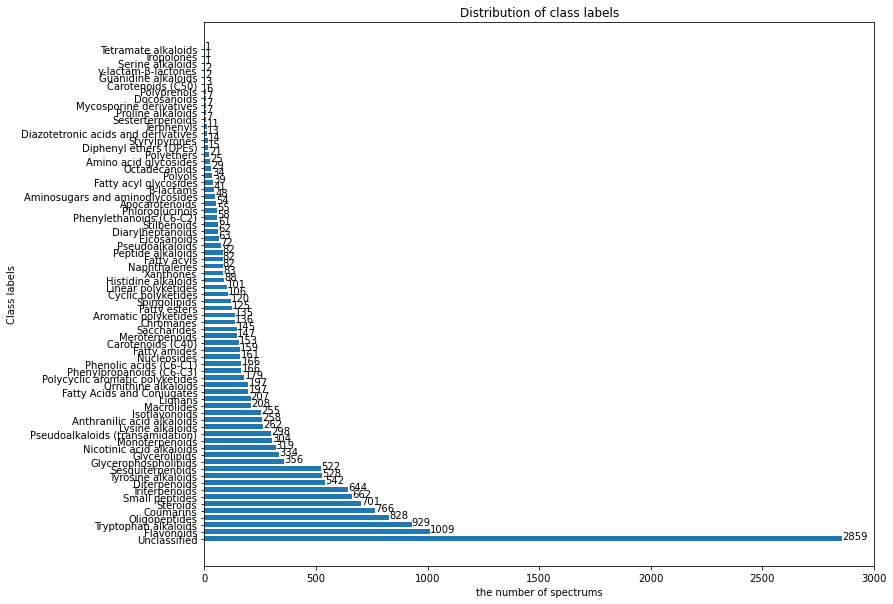

In [33]:
## Plot
data=list(sorted_label_distri.values())
data_lbs = list(sorted_label_distri.keys())

plt.figure(figsize=(12,10))

plt.barh(range(len(data)), data, height=0.7) # range(len(label_distri))
plt.ylabel('Class labels')
plt.xlabel('the number of spectrums')
plt.title('Distribution of class labels')
plt.yticks(range(len(data)), data_lbs)
for i in range(len(data)):
  plt.text(data[i]+0.1,i,"%s"%data[i])

# plt.savefig('/mnt/scratch/ding013/MS2ChemClass/classlabel_distr/all_label_distri_50.png', dpi=600)
plt.show()

## Summary plot

In [39]:
# Get all values of distribution
num_labels = list(sorted_label_distri.values())
len(num_labels)

# Define ranges
num_range = np.linspace(0,500,6, endpoint=True, dtype=int)
print(num_range)

# Summary the distribution
sum_dict={}
for i in range(len(num_range)):
    if i != len(num_range)-1:        
        count_num=0
        for j in num_labels:
            if j in range(num_range[i],num_range[i+1]):
                count_num+=1
        sum_dict['%s to %s'%(num_range[i],num_range[i+1])]=count_num
    else:
        count_num=0
        for j in num_labels:
            if j >= num_range[-1]:
                count_num+=1
        sum_dict['%s to'%num_range[i]]=count_num
print(sum_dict)
        
    

[  0 100 200 300 400 500]
{'0 to 100': 34, '100 to 200': 16, '200 to 300': 6, '300 to 400': 4, '400 to 500': 0, '500 to': 11}


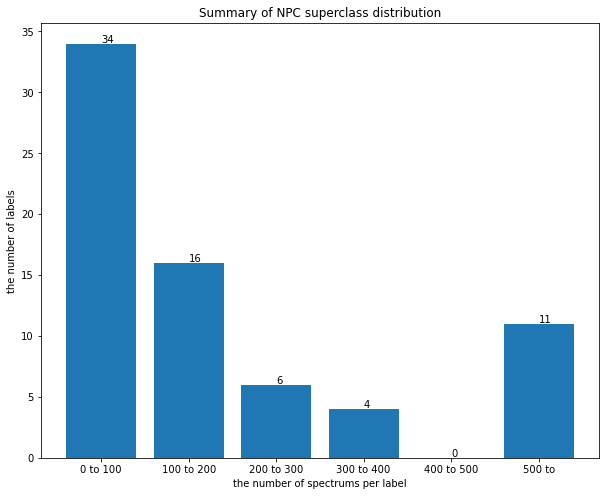

In [41]:
# Plot the summary of distribution
data = list(sum_dict.values())
data_name = list(sum_dict.keys())

plt.figure(figsize=(10,8))
plt.bar(range(len(data)), data)
plt.xlabel('the number of spectrums per label')
plt.ylabel('the number of labels')
plt.title('Summary of NPC superclass distribution')
plt.xticks(range(len(data)), data_name)
for i in range(len(data)):
  plt.text(i,data[i]+0.1,"%s"%data[i])

# plt.savefig('/mnt/scratch/ding013/MS2ChemClass/classlabel_distr/distri_summary.png')
plt.show()